## Wine Quality Prediction
Here we will predict the quality of wine on the basis of given features.We use the wine quality dataset available on interenet for free. This dataset has the fundamental features which are responsible for affecting the quality of the wine.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading first five dataset.
df = pd.read_csv("winequalityN.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# Let's explore datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
# The descriptive statistical measures of the datadet. 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


### Let's do EDA
Exploratory Data Analysis is a way to analyse the data using visual techniques
It is used to discover trends, and patterns with the help of statistical summeries and graphical representations.

In [5]:
# Let's check the number of null values in the dataset columns wise.
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
# We have a column with object data type as well let's replace it with the 0 and 1 as there are only two categories.
df["type"].replace({"red":0,"white":1},inplace=True)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
#Let's impute the missing values by means as the data present in the different columns columns are continuous values.
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

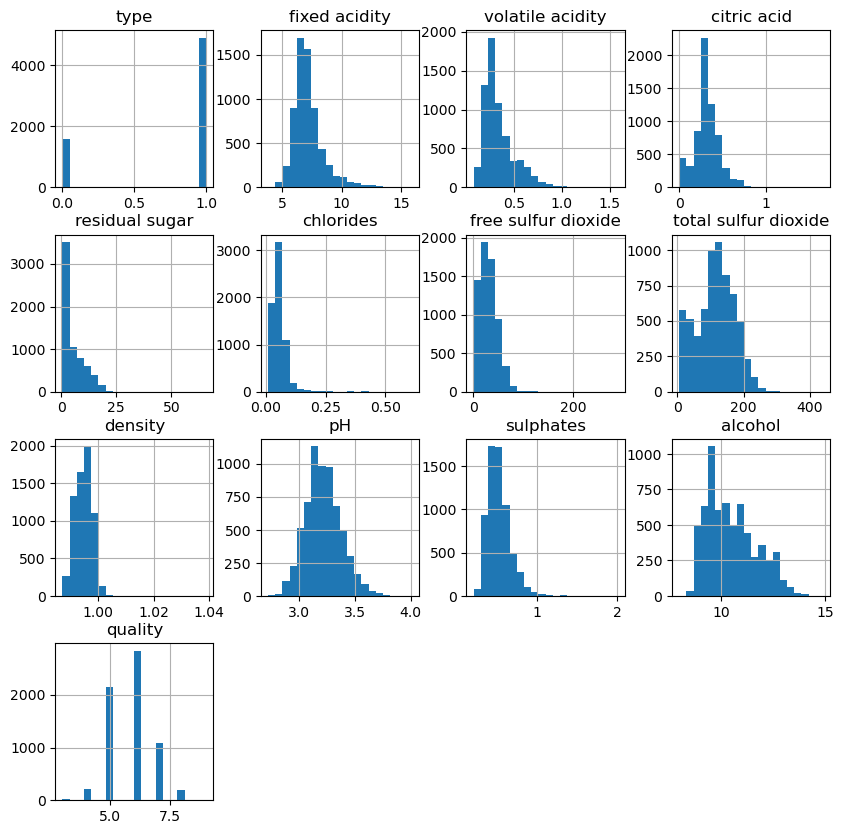

In [8]:
# Let's draw the histogram to visualise the distribution of the data with continuous of the data with continuous values in the columns of the dataset.
df.hist(bins=20, figsize=(10,10))
plt.show()

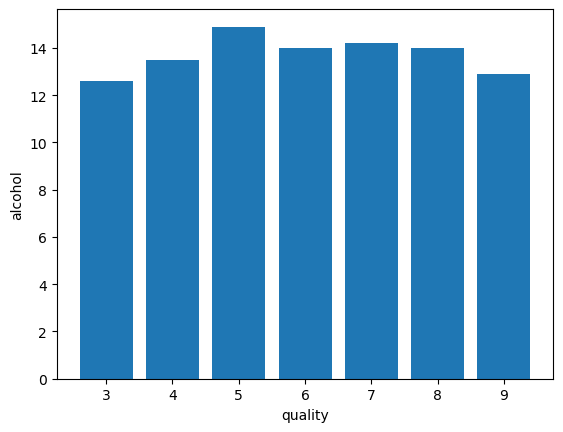

In [9]:
# Now let's draw the count plot to visualise the number data for data quality of wine.
plt.bar(df["quality"],df["alcohol"])
plt.xlabel("quality")
plt.ylabel("alcohol")
plt.show()

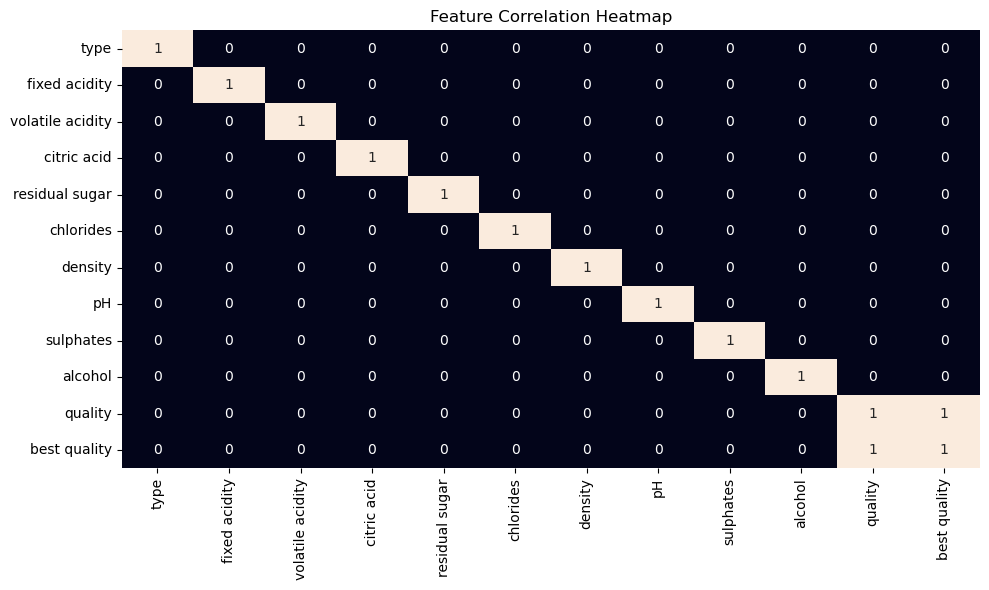

In [33]:
# convert "object" columns to numerical if they represent numbers
for col in df.columns:
    if df[col].dtype == "object":
        try:
            df[col] = pd.to_numeric(df[col],errors="coerce")
# convert to numeric,replace non-convertibles with NaN
        except:
            pass  # skip
plt.figure(figsize = (10,6))
sb.heatmap(df.corr() > 0.7, annot= True, cbar= False)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [11]:
#From the above heat map we can conclude that the "total sulphur dioxide" and "free sulphur dioxide" are highly correlated features so, we will remove them.

df = df.drop(["total sulfur dioxide","free sulfur dioxide"], axis=1)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,1.00100,3.00,0.450000,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,0.99400,3.30,0.490000,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,0.99510,3.26,0.440000,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,0.99560,3.19,0.400000,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,0.99490,3.45,0.580000,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,0.99512,3.52,0.531215,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,0.99574,3.42,0.750000,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,0.99547,3.57,0.710000,10.2,5


### Model Development

Let's prepare our data for training and splitting it into training and validation data so, that we can select which model's performance is best as per the use case.

In [12]:
df["best quality"] = [1 if x > 5 else 0 for x in df.quality]

In [13]:
#New column has been made with name "best quality".
print(df["best quality"].value_counts())
df.head()

best quality
1    4113
0    2384
Name: count, dtype: int64


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality,best quality
0,1,7.0,0.27,0.36,20.7,0.045,1.0010,3.00,0.45,8.8,6,1
1,1,6.3,0.30,0.34,1.6,0.049,0.9940,3.30,0.49,9.5,6,1
2,1,8.1,0.28,0.40,6.9,0.050,0.9951,3.26,0.44,10.1,6,1
3,1,7.2,0.23,0.32,8.5,0.058,0.9956,3.19,0.40,9.9,6,1
4,1,7.2,0.23,0.32,8.5,0.058,0.9956,3.19,0.40,9.9,6,1


In [14]:
df.drop(["quality"],axis=1)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,best quality
0,1,7.0,0.270,0.36,20.7,0.045,1.00100,3.00,0.450000,8.8,1
1,1,6.3,0.300,0.34,1.6,0.049,0.99400,3.30,0.490000,9.5,1
2,1,8.1,0.280,0.40,6.9,0.050,0.99510,3.26,0.440000,10.1,1
3,1,7.2,0.230,0.32,8.5,0.058,0.99560,3.19,0.400000,9.9,1
4,1,7.2,0.230,0.32,8.5,0.058,0.99560,3.19,0.400000,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,0.99490,3.45,0.580000,10.5,0
6493,0,5.9,0.550,0.10,2.2,0.062,0.99512,3.52,0.531215,11.2,1
6494,0,6.3,0.510,0.13,2.3,0.076,0.99574,3.42,0.750000,11.0,1
6495,0,5.9,0.645,0.12,2.0,0.075,0.99547,3.57,0.710000,10.2,0


In [15]:
# Segregating features and the target variables from the dataset.
features = df.drop(["best quality","quality"],axis=1)
target=df["best quality"]

In [16]:
# Our features and target are ready.
features

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol
0,1,7.0,0.270,0.36,20.7,0.045,1.00100,3.00,0.450000,8.8
1,1,6.3,0.300,0.34,1.6,0.049,0.99400,3.30,0.490000,9.5
2,1,8.1,0.280,0.40,6.9,0.050,0.99510,3.26,0.440000,10.1
3,1,7.2,0.230,0.32,8.5,0.058,0.99560,3.19,0.400000,9.9
4,1,7.2,0.230,0.32,8.5,0.058,0.99560,3.19,0.400000,9.9
...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,0.99490,3.45,0.580000,10.5
6493,0,5.9,0.550,0.10,2.2,0.062,0.99512,3.52,0.531215,11.2
6494,0,6.3,0.510,0.13,2.3,0.076,0.99574,3.42,0.750000,11.0
6495,0,5.9,0.645,0.12,2.0,0.075,0.99547,3.57,0.710000,10.2


In [17]:
target 

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    1
6494    1
6495    0
6496    1
Name: best quality, Length: 6497, dtype: int64

In [18]:
# After segregating features and the target variables from the dataset.
# spliting it into 80:20 for model selection.
x_train,x_test,y_train,y_test =train_test_split(features,target,test_size=0.2,random_state=40)

In [19]:
# Impute missing values after splitting 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean") 
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

x_train.shape , x_test.shape

((5197, 10), (1300, 10))

In [20]:
# Normalising the data before training help us to achieve stable and fast training of the model.
norm = MinMaxScaler()
x_train = norm.fit_transform(x_train)
x_test = norm.transform(x_test)

In [21]:
# Data has been prepared completely let's train.
models = [LogisticRegression(),XGBClassifier(), SVC(kernel = "rbf")]
for i in range(3):
    models[i].fit(x_train,y_train)   
    
    print(f"{models[i]} : ")
    print("Training Accuracy: ", metrics.roc_auc_score(y_train,models[i].predict(x_train)))
    print("Validation Accuracy: ", metrics.roc_auc_score(y_test,models[i].predict(x_test)))
    print()

LogisticRegression() : 
Training Accuracy:  0.7019886368161423
Validation Accuracy:  0.7019518599115251

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Training Accuracy:  0.969138299854894
Validation Accuracy:  0.7913384620099917

SVC() : 
Training Accuracy:  0.706251343942582
Vali

### Model Evaluation
From the above accuracies we can say that Logistic Regression and SVC() Classifier performing better on the validation data with less difference between the validation and training data. Let's plot the confusion matrix as well for the validation data using the Logistic Regression model. 


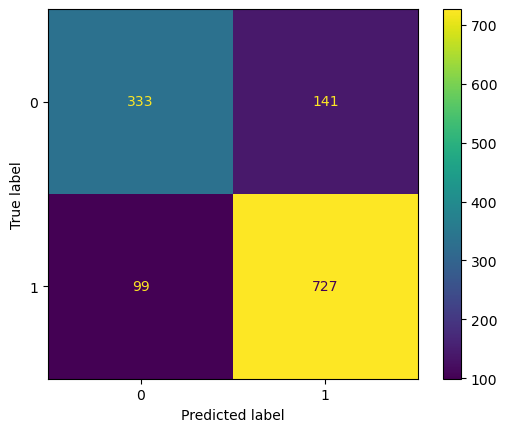

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming "models[1]" is my trained classifier.
cm = confusion_matrix(y_test,models[1].predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=models[1].classes_)
# Assuming my model has a "classes_" attribute
disp.plot()
plt.show()

In [34]:
# printing classification report for the best performing model.
print(metrics.classification_report(y_test,models[1].predict(x_test)))

              precision    recall  f1-score   support

           0       0.77      0.70      0.74       474
           1       0.84      0.88      0.86       826

    accuracy                           0.82      1300
   macro avg       0.80      0.79      0.80      1300
weighted avg       0.81      0.82      0.81      1300



### Insights:

  - Alcohol (highest impact): Higher alcohol content strongly correlates with better quality ratings
 Sulphates & citric acid: Key chemical contributors to perceived quality
Volatile acidity: Higher levels degrade quality (inverse relationship)
